### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [4]:
# Q. NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.
# 컬럼 선택 : 'Close' 'Start' 'High' 'Low'
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis=1,inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

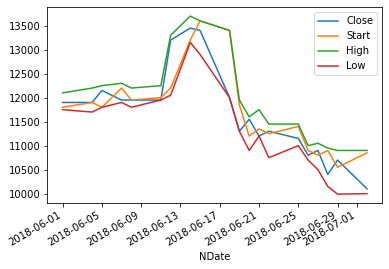

In [5]:
# 선 그래프
df1.plot()

<AxesSubplot:xlabel='NDate'>

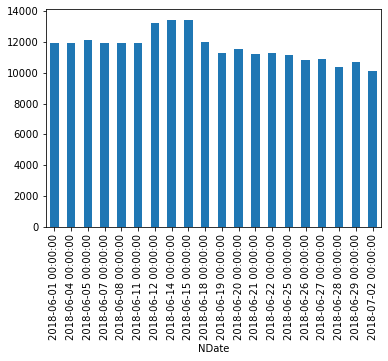

In [7]:
# 막대 그래프
df1.Close[::-1].plot(kind='bar')

<AxesSubplot:xlabel='NDate'>

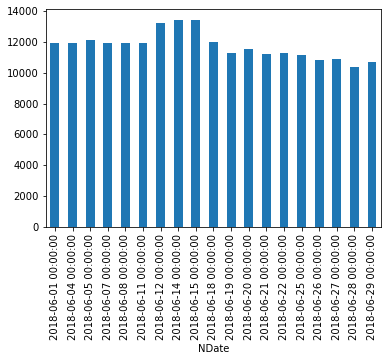

In [12]:
# Q. 6월만을 추출하여 Close 칼럼으로 일별 막대 그래프를 표현하세요
df1.loc['2018-6','Close'][::-1].plot(kind='bar')

In [14]:
df1.Close.value_counts()

11950    3
11300    2
11900    2
10400    1
13450    1
10700    1
11150    1
10800    1
12000    1
13200    1
10100    1
12150    1
13400    1
11200    1
10900    1
11550    1
Name: Close, dtype: int64

<AxesSubplot:ylabel='Frequency'>

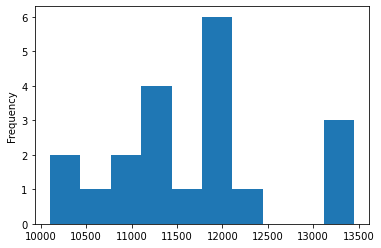

In [17]:
df1.Close.plot(kind='hist',bins=10)

<AxesSubplot:ylabel='Frequency'>

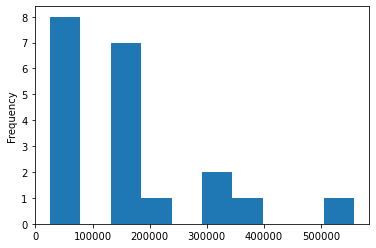

In [21]:
# Q. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요.
df.Volume.plot(kind='hist')

<AxesSubplot:xlabel='Close', ylabel='Volume'>

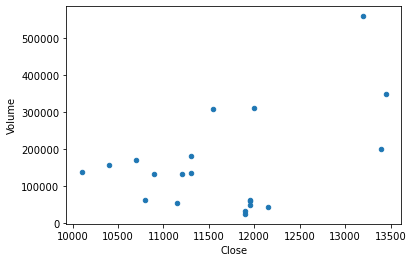

In [22]:
# Q. Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.
df.plot(x='Close',y='Volume',kind='scatter')

In [23]:
df.corr()

,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


<AxesSubplot:>

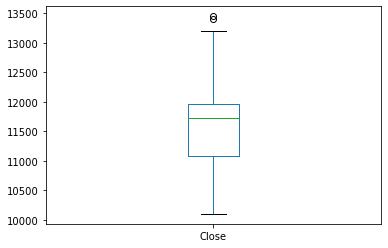

In [24]:
# Q. Close 칼럼의 Box Plot을 표현하세요.
df.Close.plot(kind='box')

In [25]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값 

In [30]:
iqr = 11962.500000 - 11087.500000
uw_check = 11962.500000 + iqr*1.5
print(uw_check,'\n')
c = df.Close.sort_values(ascending=False)
print(c[:5],'\n')
df.Close[df.Close >= uw_check]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 



11    13400
12    13450
Name: Close, dtype: int64

In [26]:
# Q. Close 칼럼의 이상치를 구하세요.
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
outlier = []
for i in df.Close:
    if not Q1 - IQR*1.5 < i < Q3 + IQR*1.5:
        outlier.append(i)
print(outlier)

[13400, 13450]


In [29]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close']<=(Q1-IQR*1.5))|(df['Close']>=(Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [ ]:
# 과제
# Q. Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

In [33]:
df_ep = pd.read_excel('dataset/df_ep.xlsx')
df_ep.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


<AxesSubplot:xlabel='year'>

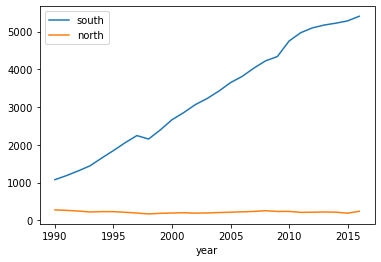

In [35]:
df_ep.set_index('year',inplace=True)
df_ep.plot()

In [ ]:
# 과제
# Q. 남북한 발전량 데이터를 시각적으로 탐색하고 그 특징을 요약 기술하세요.

In [36]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# [과제]
# Q. df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요.(5개 이상)

In [ ]:
# [과제]
# Q. mpg 컬럼의 이상치를 구하세요.

[과제]
통계학의 기초 개념을 설명하세요.
1. 모수의 개념 및 사례
2. 통계량의 개념 및 사례
3. 확률변수, 확률, 확률분포
4. 도수, 도수분포, 상대도수
5. 평균값, 기대값, 분산, 표준편차
6. 확률질량함수, 확률밀도함수
7. 정규분포, 이항분포, 포아송분포
8. 표본분산(n), 불편분산(n-1)
9. 기술통계, 추측통계
10. 가설과 검정
